# Proposal
Predict the sale price of used cars given available data

# Library Imports

In [1]:
import pandas as pd
# import tensorflow as tf
# from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Data Exploration

In [2]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
null_percent = df.apply(lambda col: col.isna().sum()/len(col)*100,axis=0)
print(null_percent)
df_clean = df.dropna()
print(f"Data lost when dropping all NaN values: {(1-len(df_clean)/len(df))*100:.2f}%")

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64
Data lost when dropping all NaN values: 2.73%


In [5]:
c = df_clean.dtypes == "object"
categorical_columns = list(c[c].index)
n = df_clean.dtypes != "object" 
numerical_columns = list(n[n].index)
print(f"Categorical columns:{categorical_columns}")
print(f"Numerical columns:{numerical_columns}")

Categorical columns:['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']
Numerical columns:['year', 'selling_price', 'km_driven', 'seats']


## Transforming some categorical to numerical data
Here i removed torque because it's too inconsistent for an easy transformation, like other columns  
I also removed selling_price because its the variable we want to predict

In [6]:
df_transform = df_clean.copy()
df_transform["mileage"]=df_clean["mileage"].apply(lambda v: float(v.split(" ")[0]))
df_transform["engine"]=df_clean["engine"].apply(lambda v: int(v.split(" ")[0]))
df_transform["max_power"]=df_clean["max_power"].apply(lambda v: float(v.split(" ")[0]))
df_transform.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
changed_cols = ["mileage","engine","max_power"]
numerical_columns+=changed_cols
for col in changed_cols:
    categorical_columns.remove(col)
categorical_columns.remove("torque")
numerical_columns.remove("selling_price")
print(f"New Categorical columns: {categorical_columns}")
print(f"New Numerical columns: {numerical_columns}")

New Categorical columns: ['name', 'fuel', 'seller_type', 'transmission', 'owner']
New Numerical columns: ['year', 'km_driven', 'seats', 'mileage', 'engine', 'max_power']


# Numerical Data

## Distribution

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'seats'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>]], dtype=object)

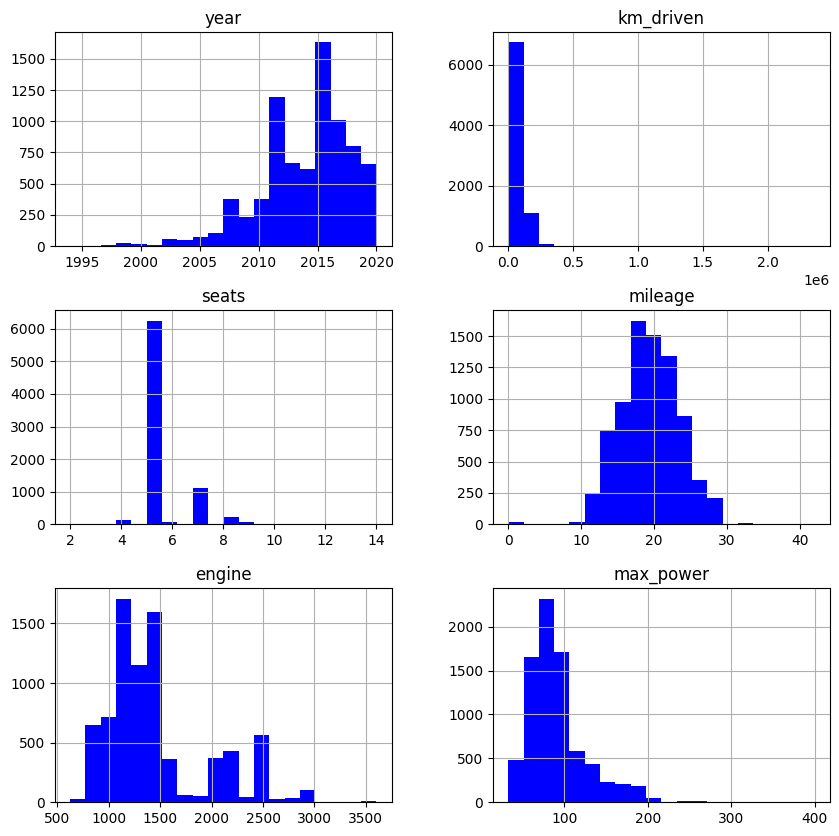

In [8]:
df_transform[numerical_columns].hist(bins = 20, figsize= (10,10), color= 'b')

#### Outliers
Here i choose to remove the 1% lowest and the 1% highest quantile, leaving 98% of the remaining data

In [9]:
def remove_outliers(df:pd.DataFrame,columns:list[str]):
    df_filtered = df.copy()
    for col in columns:
        q_low = df[col].quantile(0.01)
        q_hi  = df[col].quantile(0.99)
        df_filtered = df_filtered[(df_filtered[col] < q_hi) & (df_filtered[col] > q_low)]
    return df_filtered
def minmaxscale_column(df:pd.DataFrame, columns:list[str], lower_boundary:int=0,upper_boundary:int=1,inplace=False):
    scaler = MinMaxScaler((lower_boundary,upper_boundary))
    if(inplace):
        for col_name in columns:
            df[col_name] = scaler.fit_transform(df[[col_name]])
        return
    normalized_df = df.copy()
    for col_name in columns:
        normalized_df[col_name] = scaler.fit_transform(normalized_df[[col_name]])
    return normalized_df
        

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'seats'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>]], dtype=object)

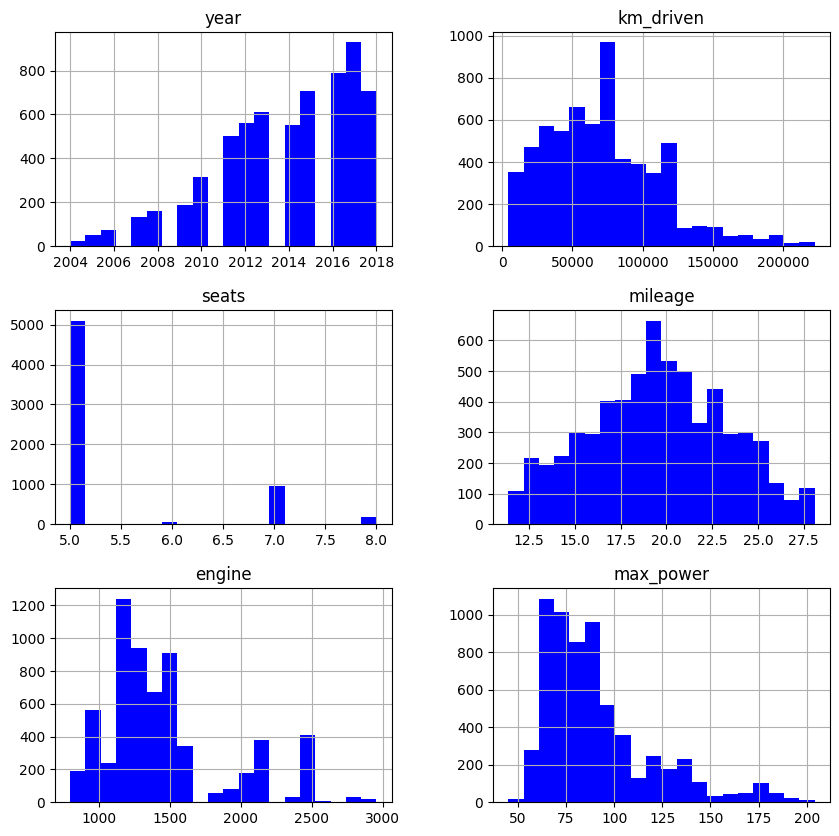

In [10]:
outliers_df = remove_outliers(df_transform,numerical_columns)
outliers_df[numerical_columns].hist(bins = 20, figsize=(10, 10), color= 'b')

# Normalization
Here i choose to use minmaxscale with lower boundary 0 and higher boundary 1

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'seats'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>]], dtype=object)

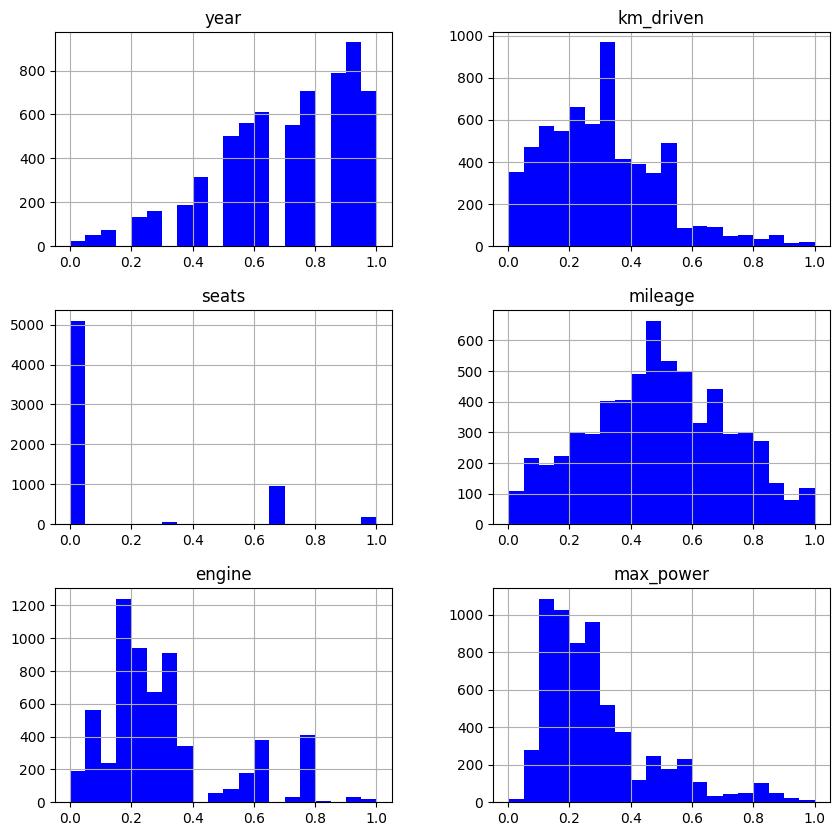

In [11]:
normalized_df = minmaxscale_column(outliers_df,numerical_columns)
normalized_df[numerical_columns].hist(bins = 20, figsize=(10, 10), color= 'b')

# Categorical Data

In [12]:
categorical_df = normalized_df.copy()
categorical_df["name"] = normalized_df["name"].apply(lambda name: str(name).split(" ")[0])
for col in categorical_columns:
    print("-"*50)
    print(categorical_df[col].value_counts(normalize=True))

--------------------------------------------------
name
Maruti           0.259641
Hyundai          0.197429
Tata             0.100143
Mahindra         0.097604
Honda            0.062688
Toyota           0.059356
Ford             0.055705
Renault          0.032376
Chevrolet        0.032217
Volkswagen       0.026662
Skoda            0.015712
Nissan           0.012062
Jaguar           0.010633
Datsun           0.008887
Fiat             0.006507
BMW              0.006031
Mercedes-Benz    0.005555
Audi             0.004285
Jeep             0.002857
Mitsubishi       0.001428
Force            0.000952
Volvo            0.000476
Ambassador       0.000317
Ashok            0.000159
Land             0.000159
Isuzu            0.000159
Name: proportion, dtype: float64
--------------------------------------------------
fuel
Diesel    0.580225
Petrol    0.409459
CNG       0.005396
LPG       0.004920
Name: proportion, dtype: float64
--------------------------------------------------
seller_type
Individ

In [13]:
def ordinal_encode_columns(df:pd.DataFrame,columns:list[str],inplace=False):
    if(inplace):
        for col_name in columns:
            # Instantiate new encoder every time so that it reset the encoding index, otherwise it will start encoding the new column where the last one ended
            encoder = OrdinalEncoder()
            df[col_name] = encoder.fit_transform(df[[col_name]])
        return
    encoded_df = df.copy()
    for col_name in columns:
        # Instantiate new encoder every time so that it reset the encoding index, otherwise it will start encoding the new column where the last one ended
        encoder = OrdinalEncoder()
        encoded_df[col_name] = encoder.fit_transform(encoded_df[[col_name]])
    return encoded_df

In [14]:
encoded_df = ordinal_encode_columns(categorical_df,categorical_columns)
encoded_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,16.0,0.714286,450000,0.647715,1.0,1.0,1.0,0.0,0.719665,0.208159,0.182390,190Nm@ 2000rpm,0.0
1,21.0,0.714286,370000,0.530745,1.0,1.0,1.0,2.0,0.584579,0.324061,0.368050,250Nm@ 1500-2500rpm,0.0
2,9.0,0.142857,158000,0.622486,3.0,1.0,1.0,3.0,0.378960,0.323598,0.207547,"12.7@ 2,700(kgm@ rpm)",0.0
3,10.0,0.428571,225000,0.562854,1.0,1.0,1.0,0.0,0.695756,0.276773,0.283019,22.4 kgm at 1750-2750rpm,0.0
4,16.0,0.214286,130000,0.530745,3.0,1.0,1.0,0.0,0.283323,0.231340,0.271698,"11.5@ 4,500(kgm@ rpm)",0.0


<Axes: >

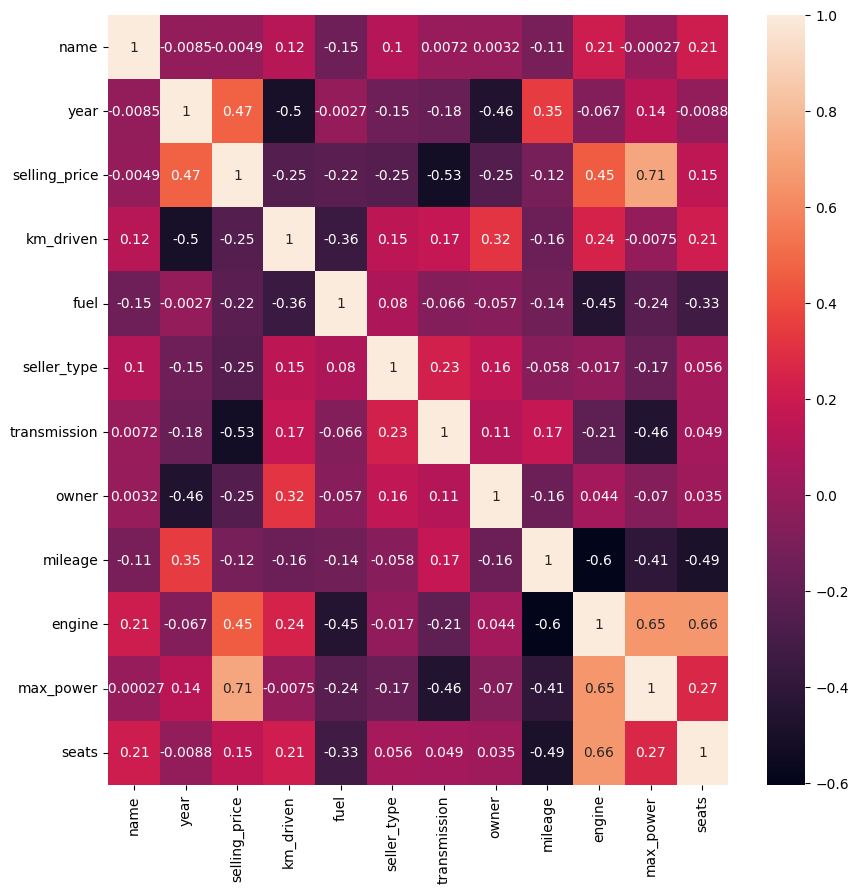

In [15]:
cols = list(encoded_df.columns)
cols.remove("torque")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(encoded_df[cols].corr(),annot=True)

# Model

# Selecting Features
Since the only column that I wasn't able to come up with a solution for was the ***torque***, that's the only columns missing from the features

In [16]:
price_corr = encoded_df[cols].corr()["selling_price"]
price_corr = price_corr.apply(lambda x: abs(x))
possible_features = price_corr[price_corr>price_corr.median()]
print(possible_features)

year             0.470160
selling_price    1.000000
transmission     0.525446
owner            0.254426
engine           0.449455
max_power        0.711954
Name: selling_price, dtype: float64


In [17]:
features = list(encoded_df.columns)
removed_features = ["selling_price","torque","name"]
for f in removed_features:
    features.remove(f)
prediction = ["selling_price"]
print(f"features: {features}")
print(f"prediction: {prediction}")

features: ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
prediction: ['selling_price']


In [18]:
X = encoded_df[features].copy()
y = encoded_df[prediction].copy()
print(X.shape)
print(y.shape)

(6301, 10)
(6301, 1)


# Test and train data

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6978307328944233

# KNeighbors Regression

In [21]:
from sklearn.neighbors import KNeighborsRegressor

results = []

n_neighbors = range(3,15,3)
weights = ["uniform","distance"]
algorithms=["auto","ball_tree","kd_tree","brute"]
leaf_size=range(5,50,5)
p_values = [1,2]
print("Started")
for n in n_neighbors:
    for w in weights:
        for a in algorithms:
            for l in leaf_size:
                for p in p_values:
                    model = KNeighborsRegressor(n_neighbors=n,weights=w,algorithm=a,leaf_size=l,p=p)
                    model.fit(X_train,y_train)
                    score = model.score(X_test,y_test)
                    result = {"score":score,"parameters":{"n_neighbors":n,"weights":w,"algorithm":a,"leaf_size":l,"p":p}}
                    results.append(result)
print("Finished")
results.sort(reverse=True,key=lambda d: d["score"])
best_score = results[0]["score"]
best_parameters = results[0]["parameters"]
print(f"Best score: {best_score:.2f}\nUsed parameters:\n{best_parameters}")

Started
Finished
Best score: 0.91
Used parameters:
{'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 5, 'p': 1}


# Tesintg a Prediction

In [22]:
best_model = KNeighborsRegressor(
    n_neighbors=best_parameters["n_neighbors"],
    weights=best_parameters["weights"],
    algorithm=best_parameters["algorithm"],
    leaf_size=best_parameters["leaf_size"],
    p=best_parameters["p"])
model.fit(X_train,y_train)
print("Predicted price: "+str(model.predict([[0.8, 0.5, 1.0, 1.0, 1.0, 0.0, 0.8, 0.1, 0.2, 0.0]])[0][0]))

Predicted price: 473464.6487181357


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# Retraining only with features selected by median

In [23]:
X = encoded_df[possible_features.index].copy()
y = encoded_df[prediction].copy()
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

results = []

n_neighbors = range(3,15,3)
weights = ["uniform","distance"]
algorithms=["auto","ball_tree","kd_tree","brute"]
leaf_size=range(5,50,5)
p_values = [1,2]
print("Started")
for n in n_neighbors:
    for w in weights:
        for a in algorithms:
            for l in leaf_size:
                for p in p_values:
                    model = KNeighborsRegressor(n_neighbors=n,weights=w,algorithm=a,leaf_size=l,p=p)
                    model.fit(X_train,y_train)
                    score = model.score(X_test,y_test)
                    result = {"score":score,"parameters":{"n_neighbors":n,"weights":w,"algorithm":a,"leaf_size":l,"p":p}}
                    results.append(result)
print("Finished")
results.sort(reverse=True,key=lambda d: d["score"])
best_score = results[0]["score"]
best_parameters = results[0]["parameters"]
print(f"Best score: {best_score:.2f}\nUsed parameters:\n{best_parameters}")

(6301, 6)
(6301, 1)
Started
Finished
Best score: 1.00
Used parameters:
{'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 5, 'p': 1}
